<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/estudos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import numpy as np
import seaborn
import math

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
data_path = '/content/drive/MyDrive/Bolsa - Edson/estudos/Pasta sem nome/labmim_completo_2016_2022.dat'
frame = pd.read_csv(data_path, sep=';')
frame['Sw_dir'] = [sum(i) for i in list(zip(frame['Sw_dw'],-frame['Sw_dif']))]
tempo = list(zip(frame['year'],frame['month'],frame['day'],frame['hour']))
print(frame.columns)

Index(['year', 'month', 'day', 'hour', 'T', 'Td', 'ur', 'pressure', 'WD', 'WS',
       'u', 'v', 'precip', 'Sw_dw', 'Sw_up', 'Lw_dw', 'Lw_up', 'Sw_dif',
       'Sw_par', 'RH_WXT', 'Temp_WXT', 'Net_CNR1', 'Net_NRLite', 'PSP_Wm2_Avg',
       'oc_topo', 'decl_rad', 'elev_solar', 'ang_hor', 'ang_zen',
       'ang_hor_por', 'nascer_h', 'por_h', 'ast_h', 'fc', 'Sw_dir'],
      dtype='object')


In [59]:
# Formatação de datas
datas=[]
for i in tempo:
  i = list(i)
  datas.append(datetime.datetime(i[0],i[1],i[2],i[3]))
frame['datas'] = datas
frame['year/month/day'] = list(zip(frame['datas'].dt.year, frame['datas'].dt.month, frame['datas'].dt.day))

## **Controle de dados**: filtragem de dias
* O parâmetro a ser analisado deve ser definido abaixo, nem "variavel"
* "horas_minimo" define a quantidade mínima de horas analisadas para que um dia seja considerado como conjunto de dados válido


In [72]:
def set_dados(variavel,horas):

  ### Análise de Sw_dw: corta dias com menos de 8 horas com dados
  if variavel in ['Sw_dw','Sw_up','Lw_up','Lw_dw','Sw_dif','Sw_dir','precip','oc_topo']:
    
    if variavel == 'precip':
      df = pd.DataFrame(frame, columns=['year/month/day',variavel,'oc_topo'])
    elif variavel == 'oc_topo':
      df = pd.DataFrame(frame, columns=['year/month/day',variavel,'precip'])
    else:
      df = pd.DataFrame(frame, columns=['year/month/day',variavel,'precip','oc_topo'])

    df['meses'] = frame['datas'].dt.month
    tabela = df.groupby('year/month/day')



    analise=[]
    analise_new=[]
    for i in tabela:
      analise.append(i)

    if variavel != 'precip' or 'oc_topo':
      for item in analise: # criando lista com dias com quantidade de dados suficiente
        contador=0
        tam = len(item[1])


        # Analisando dias sem info
        for k in range(0,tam):
          p = item[1].iloc[k]

          if p['precip']>0 or p['oc_topo']==0:
            p[variavel] = np.nan

          if math.isnan(p[variavel])==True: # Se dado for nulo, incrementa o contador de horas minimas
            contador=contador+1

        if contador>=horas:
          analise_new.append(item)

      for n in analise_new:
        n[1][variavel] = n[1][variavel]*0.0036

  dados_meses = []
  for a in range(12):
    dados_meses.append([])

  for i in analise_new:
    k = int(i[0][1])-1

    dados_meses[k].append(i[1].groupby('year/month/day').sum()[variavel][0])
  return dados_meses

* Plotting

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


[[25.9986996, 26.3930652, 24.0210828, 27.3333636, 27.354708, 25.562735999999997, 25.2594288, 27.9252612, 28.159416, 20.869506, 20.4630336, 23.3669412, 27.5454288, 27.2178756, 25.4149416, 28.1280708, 24.5225628, 27.3644568, 27.2765088, 27.6347124, 23.9901624, 27.2869128, 27.0816984, 28.238342399999997, 20.205882, 28.041973199999997, 26.4824676, 25.2694224, 24.7510188, 26.1550692, 28.003849199999998, 22.1603976, 16.063146, 20.955672, 16.8729372, 22.82913, 25.299702, 25.8055596, 25.4213316, 24.488312399999998, 21.5981712, 14.0911272, 20.218759199999997, 20.7323928, 22.7427012, 25.5449484, 23.311026, 21.8060352, 21.7844856, 24.4206576, 24.9260976, 24.8302116, 24.6101904, 25.8466248, 19.7954964, 24.74496, 0.0, 0.0, 24.628237199999997, 23.762646, 17.7358104, 17.420742, 29.3708952, 28.4253948, 27.604796399999998, 20.324642400000002, 29.129050799999998, 26.441060399999998, 24.7588632, 28.5549264, 26.0942796, 23.769612, 20.292933599999998, 27.3256704, 25.3289988, 23.2123572, 22.699605599999998,

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Text(0.5, 1.0, 'Médias diária de Lw_up')

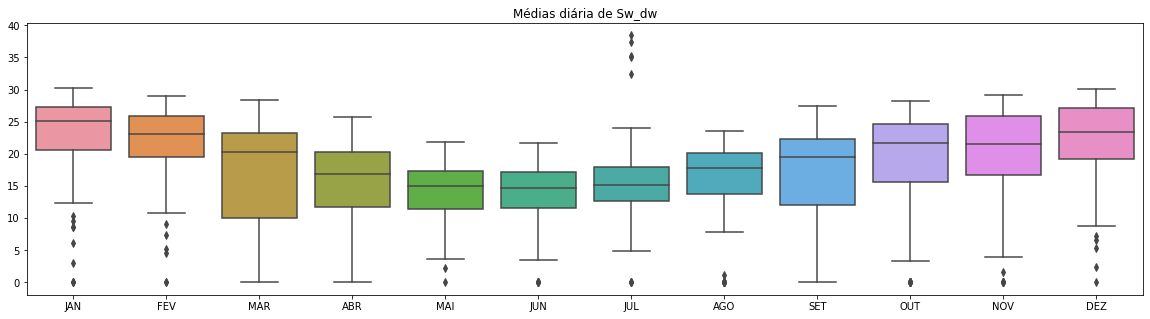

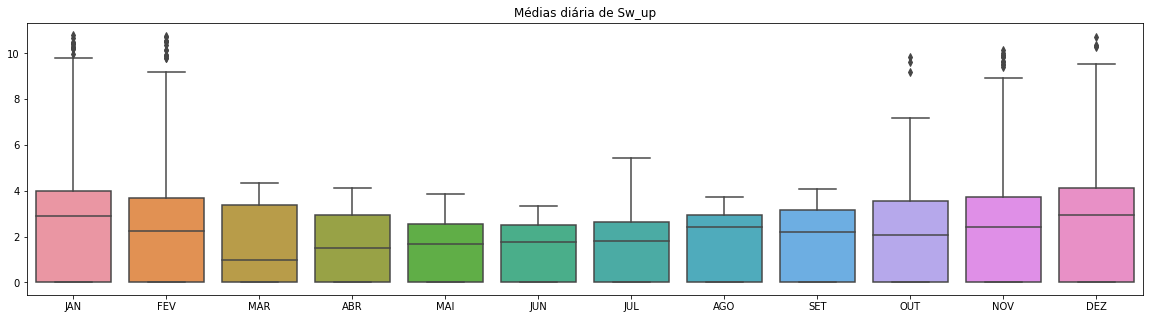

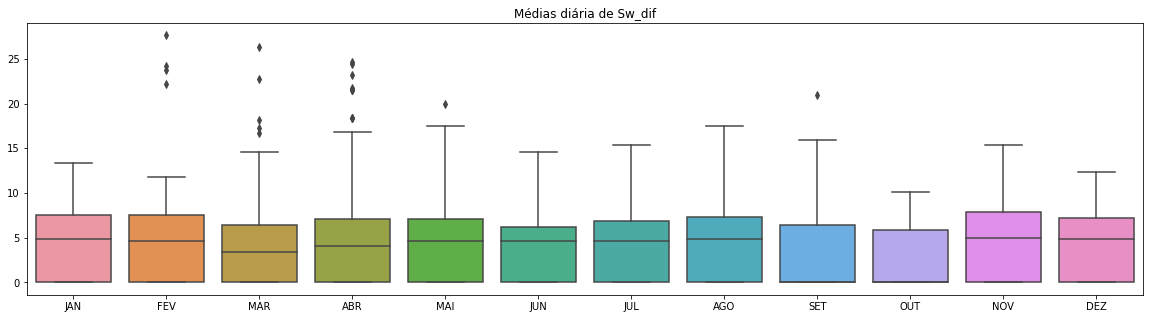

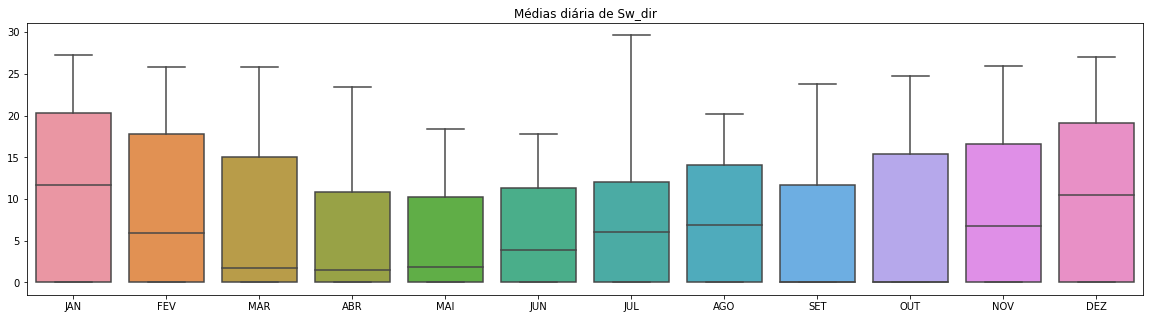

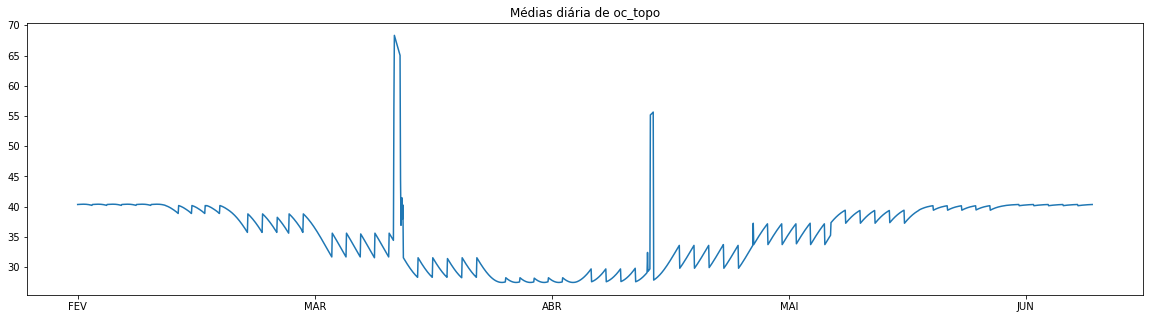

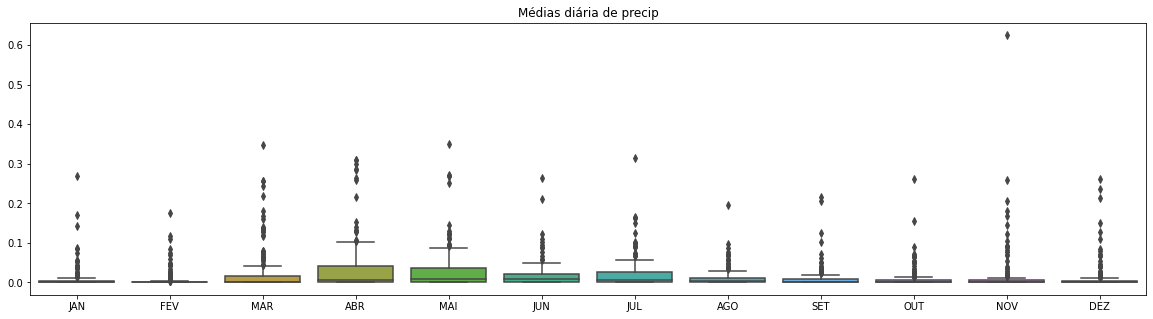

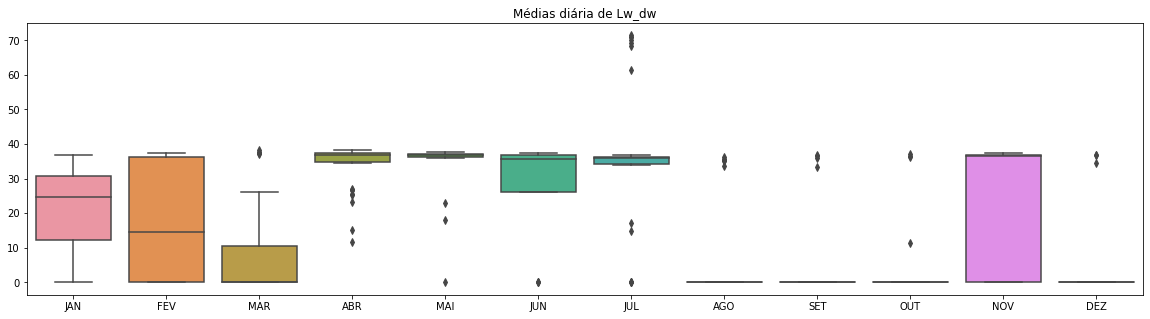

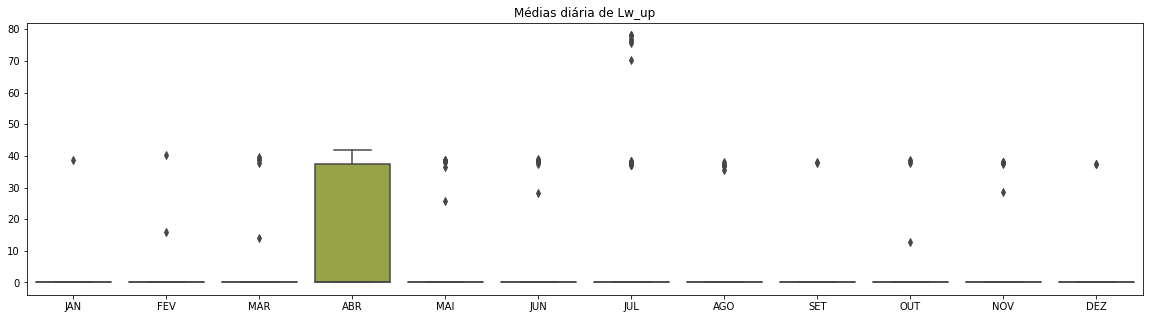

In [73]:
m_label = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']

fig, ax1 = plt.subplots(figsize=(20,5))
variavel = 'Sw_dw'
ax1 = seaborn.boxplot(data = set_dados(variavel,8), orient='v')
ax1.set_xticklabels(m_label)
ax1.set_title("Médias diária de {}".format(variavel))
print(set_dados(variavel,8))

fig, ax2 = plt.subplots(figsize=(20,5))
variavel = 'Sw_up'
ax2 = seaborn.boxplot(data = set_dados(variavel,8), orient='v')
ax2.set_xticklabels(m_label)
ax2.set_title("Médias diária de {}".format(variavel))

fig, ax3 = plt.subplots(figsize=(20,5))
variavel = 'Sw_dif'
ax3 = seaborn.boxplot(data = set_dados(variavel,8), orient='v')
ax3.set_xticklabels(m_label)
ax3.set_title("Médias diária de {}".format(variavel))

fig, ax4 = plt.subplots(figsize=(20,5))
variavel = 'Sw_dir'
ax4 = seaborn.boxplot(data = set_dados(variavel,8), orient='v')
ax4.set_xticklabels(m_label)
ax4.set_title("Médias diária de {}".format(variavel))

fig, ax5 = plt.subplots(figsize=(20,5))
variavel = 'oc_topo'
dados_meses = set_dados(variavel,8)
dados_topo = []
for i in dados_meses:
  for j in i:
    dados_topo.append(j)
ax5 = seaborn.lineplot(data = dados_topo)
ax5.set_xticklabels(m_label)
ax5.set_title("Médias diária de {}".format(variavel))

fig, ax6 = plt.subplots(figsize=(20,5))
variavel = 'precip'
ax6 = seaborn.boxplot(data = set_dados(variavel,8), orient='v')
ax6.set_xticklabels(m_label)
ax6.set_title("Médias diária de {}".format(variavel))

fig, ax7 = plt.subplots(figsize=(20,5))
variavel = 'Lw_dw'
ax7 = seaborn.boxplot(data = set_dados(variavel,18), orient='v')
ax7.set_xticklabels(m_label)
ax7.set_title("Médias diária de {}".format(variavel))

fig, ax8 = plt.subplots(figsize=(20,5))
variavel = 'Lw_up'
ax8 = seaborn.boxplot(data = set_dados(variavel,18), orient='v')
ax8.set_xticklabels(m_label)
ax8.set_title("Médias diária de {}".format(variavel))